In [1]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

np.random.seed(42)

In [3]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2] / 2, bboxes[1] - bboxes[3] / 2
    xmax, ymax = bboxes[0]+bboxes[2] / 2, bboxes[1] + bboxes[3] / 2
    return xmin, ymin, xmax, ymax

In [8]:
class_names = ['pipe']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        
        # denormalize the coordinates
        xmin = int(x1 * w)
        ymin = int(y1 * h)
        xmax = int(x2 * w)
        ymax = int(y2 * h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        ) 

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        
        # Text width and height
        tw, th = cv2.getTextSize(class_name, 0, fontScale=font_scale, thickness=font_thickness)[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image, 
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image


In [9]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()
    
    num_images = len(all_training_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

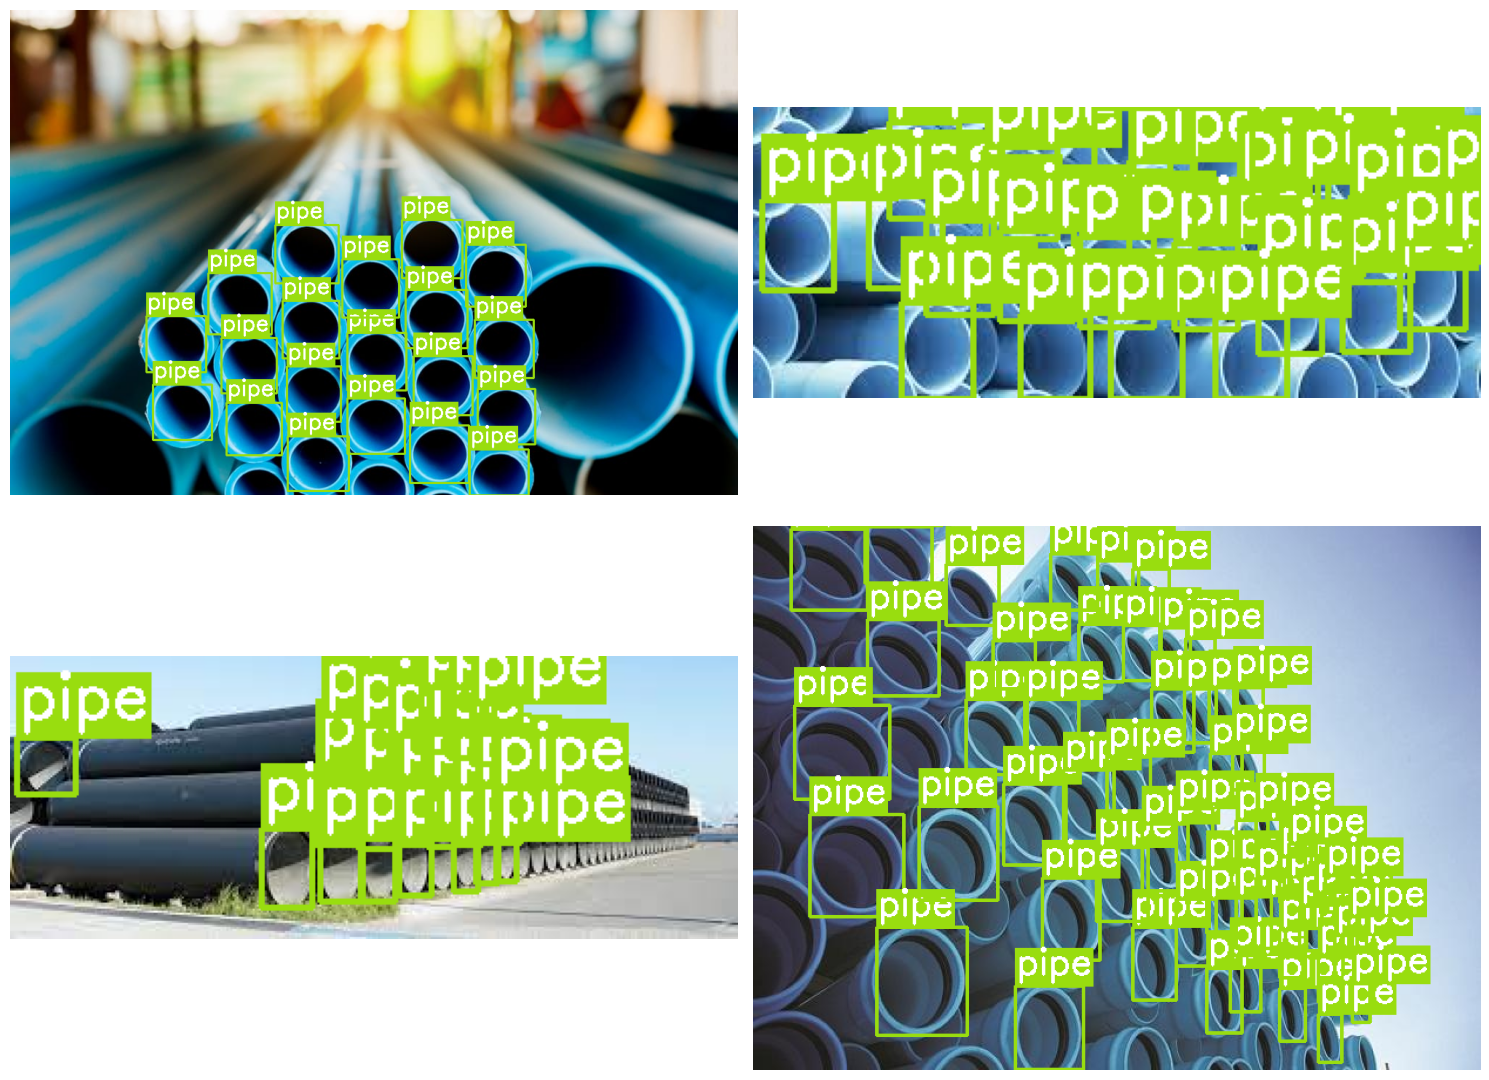

In [10]:
plot(image_paths='/Package_detection/pipe_counting/dataset/train/images/*',
     
     
    label_paths='/Package_detection/pipe_counting/dataset/train/labels/*',
    num_samples=4,
)

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [14]:
# Use the model
results = model.train(data= "/Package_detection/pipe_counting/dataset/data.yaml", epochs=300)  # train the model

New https://pypi.org/project/ultralytics/8.0.201 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=/Package_detection/pipe_counting/dataset/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train93, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None,

In [15]:
metrics = model.val()

Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning D:\Package_detection\pipe_counting\dataset\val\labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]
                   all          7        154       0.83      0.844      0.902      0.657
Speed: 2.8ms preprocess, 161.7ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs\detect\train932


In [16]:
!yolo task=detect mode=predict model=r'D:\Package_detection\pipe_counting\runs\detect\train93\weights\best.pt' source='/Package_detection/pipe_counting/dataset/test/images/f53ccb47-ffc2-4018-8b94-ba2573ae2e54.jpg'


Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 d:\Package_detection\pipe_counting\dataset\test\images\f53ccb47-ffc2-4018-8b94-ba2573ae2e54.jpg: 512x640 61 pipes, 137.9ms
Speed: 0.0ms preprocess, 137.9ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs\detect\predict
 Learn more at https://docs.ultralytics.com/modes/predict


In [17]:
!yolo task=detect mode=predict model=r'D:\Package_detection\pipe_counting\runs\detect\train93\weights\best.pt' source='/Package_detection/pipe_counting/dataset/test/images/images(2).jpg'
#D:\Package_detection\pipe_counting\dataset\test\images (2).jpg

Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 d:\Package_detection\pipe_counting\dataset\test\images\images(2).jpg: 384x640 19 pipes, 114.0ms
Speed: 0.0ms preprocess, 114.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
 Learn more at https://docs.ultralytics.com/modes/predict


In [18]:
!yolo task=detect mode=predict model=r'D:\Package_detection\pipe_counting\runs\detect\train93\weights\best.pt' source='/Package_detection/pipe_counting/dataset/test/images/images(7).jpg'

Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 d:\Package_detection\pipe_counting\dataset\test\images\images(7).jpg: 512x640 24 pipes, 132.2ms
Speed: 0.0ms preprocess, 132.2ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs\detect\predict3
 Learn more at https://docs.ultralytics.com/modes/predict


In [19]:
!yolo task=detect mode=predict model=r'D:\Package_detection\pipe_counting\runs\detect\train93\weights\best.pt' source='/Package_detection/pipe_counting/dataset/test/images/images(22).jpg'

Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 d:\Package_detection\pipe_counting\dataset\test\images\images(22).jpg: 640x640 35 pipes, 200.2ms
Speed: 0.0ms preprocess, 200.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
 Learn more at https://docs.ultralytics.com/modes/predict


In [20]:
!yolo task=detect mode=predict model=r'D:\Package_detection\pipe_counting\runs\detect\train93\weights\best.pt' source='/Package_detection/pipe_counting/dataset/test/images/images(59).jpg'

Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 d:\Package_detection\pipe_counting\dataset\test\images\images(59).jpg: 480x640 35 pipes, 131.8ms
Speed: 0.0ms preprocess, 131.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict5
 Learn more at https://docs.ultralytics.com/modes/predict


In [21]:
!yolo task=detect mode=predict model=r'D:\Package_detection\pipe_counting\runs\detect\train93\weights\best.pt' source='/Package_detection/pipe_counting/dataset/test/images/images(61).jpg'

Ultralytics YOLOv8.0.200  Python-3.9.13 torch-2.1.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 d:\Package_detection\pipe_counting\dataset\test\images\images(61).jpg: 640x640 65 pipes, 149.9ms
Speed: 0.0ms preprocess, 149.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict6
 Learn more at https://docs.ultralytics.com/modes/predict
